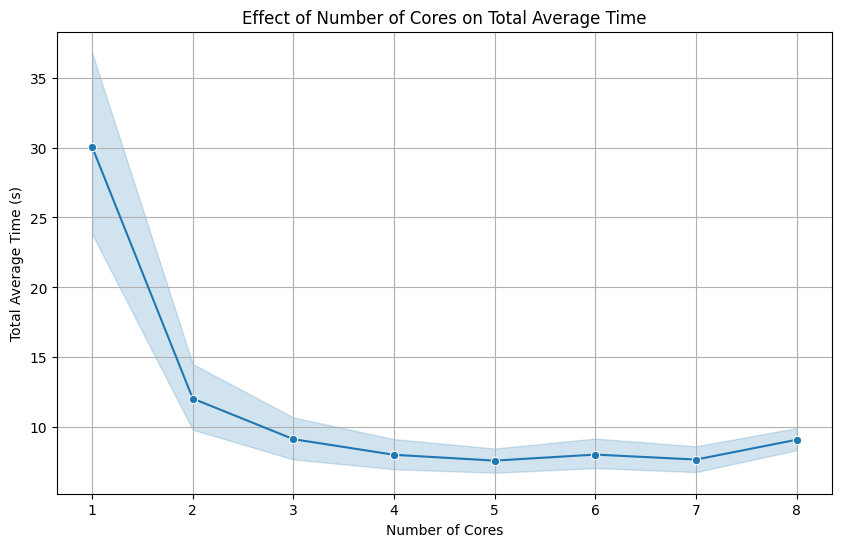

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import json


def load_benchmark_data(file_pattern: str) -> pd.DataFrame:
    """Load and combine benchmark data from JSON files into a single DataFrame."""
    files = glob.glob(file_pattern)
    data_list = []

    for file in files:
        with open(file, "r") as f:
            data = json.load(f)
            cores = int(file.split("_")[-2])
            for result in data:
                result["cores"] = cores
                data_list.append(result)

    return pd.DataFrame(data_list)


def convert_columns_to_numeric(df: pd.DataFrame, columns: list) -> None:
    """Convert specified columns in the DataFrame to numeric types."""
    df[columns] = df[columns].apply(pd.to_numeric, errors="coerce")


def plot_line(
    df: pd.DataFrame, x: str, y: str, title: str, xlabel: str, ylabel: str
) -> None:
    """Generate a line plot for the specified columns."""
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x=x, y=y, marker="o")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()


def process_and_visualize(df: pd.DataFrame) -> None:
    """Process the DataFrame and create visualizations."""
    numeric_columns = [
        "avg_route_length",
        "avg_local_opt_time",
        "avg_mpi_strategy_time",
        "mutation_rate",
        "tournament_size",
        "max_generations",
        "population_size",
        "num_cities",
        "migration_size",
        "generations_per_migration",
        "cores",
    ]
    convert_columns_to_numeric(df, numeric_columns)

    df["total_avg_time"] = df["avg_local_opt_time"] + df["avg_mpi_strategy_time"]

    plot_line(
        df=df,
        x="cores",
        y="total_avg_time",
        title="Effect of Number of Cores on Total Average Time",
        xlabel="Number of Cores",
        ylabel="Total Average Time (s)",
    )


file_pattern = "results_time/benchmark_results_*_cores.json"
df = load_benchmark_data(file_pattern)
process_and_visualize(df)

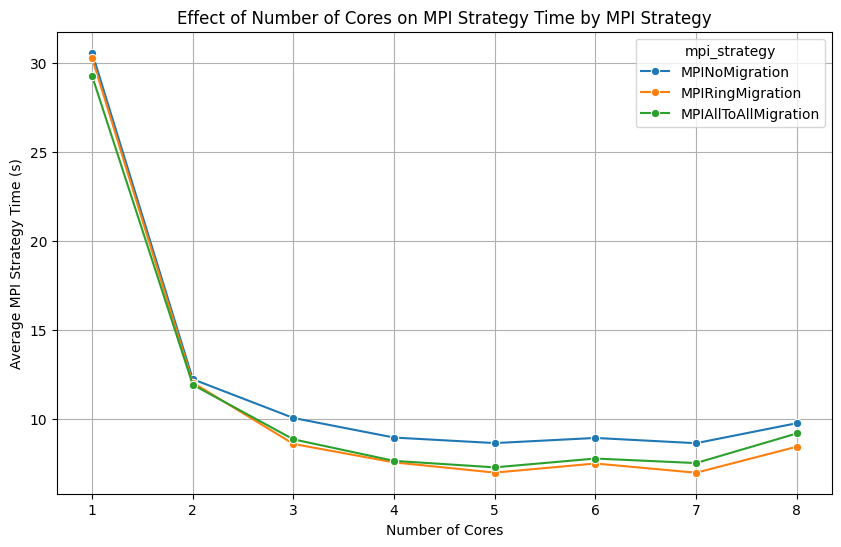

In [52]:
def plot_line_with_hue(
    df: pd.DataFrame, x: str, y: str, hue: str, title: str, xlabel: str, ylabel: str
) -> None:
    """Generate a line plot with multiple lines for different hue categories."""
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x=x, y=y, hue=hue, marker="o", err_style=None)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()


plot_line_with_hue(
    df=df,
    x="cores",
    y="avg_mpi_strategy_time",
    hue="mpi_strategy",
    title="Effect of Number of Cores on MPI Strategy Time by MPI Strategy",
    xlabel="Number of Cores",
    ylabel="Average MPI Strategy Time (s)",
)

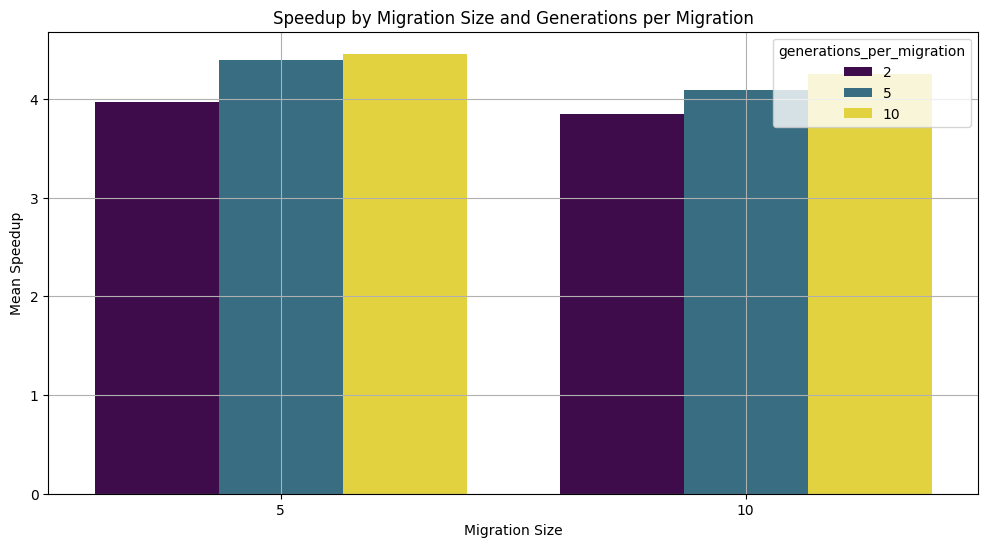

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


def calculate_speedup(df: pd.DataFrame) -> pd.DataFrame:
    """Calculate speedup based on single-core time."""
    single_core_df = (
        df[df["cores"] == 1]
        .groupby(["migration_size", "generations_per_migration"])
        .agg({"avg_mpi_strategy_time": "mean"})
        .rename(columns={"avg_mpi_strategy_time": "single_core_time"})
    )

    df = df.merge(single_core_df, on=["migration_size", "generations_per_migration"])

    df["speedup"] = df["single_core_time"] / df["avg_mpi_strategy_time"]

    return df


def plot_speedup_bar(df: pd.DataFrame) -> None:
    """Generate a bar plot comparing speedup for each migration_size and generations_per_migration combination."""
    speedup_df = (
        df.groupby(["migration_size", "generations_per_migration"])
        .agg({"speedup": "mean"})
        .reset_index()
    )

    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=speedup_df,
        x="migration_size",
        y="speedup",
        hue="generations_per_migration",
        palette="viridis",
    )
    plt.title("Speedup by Migration Size and Generations per Migration")
    plt.xlabel("Migration Size")
    plt.ylabel("Mean Speedup")
    plt.grid(True)
    plt.show()


df = load_benchmark_data(file_pattern)
df = calculate_speedup(df)

plot_speedup_bar(df)

In [57]:
import pandas as pd


def aggregate_quality_metrics(df: pd.DataFrame) -> pd.DataFrame:
    """Aggregate quality metrics by calculating mean avg_route_length."""
    quality_df = (
        df.groupby(
            [
                "optimization_strategy",
                "migration_size",
                "generations_per_migration",
                "cores",
            ]
        )
        .agg({"avg_route_length": "mean"})
        .reset_index()
    )

    return quality_df


df = load_benchmark_data(file_pattern)
df = aggregate_quality_metrics(df)

/var/folders/41/jks7nyyn6433ckh2kqf00tjc0000gn/T/ipykernel_67423/3587168383.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


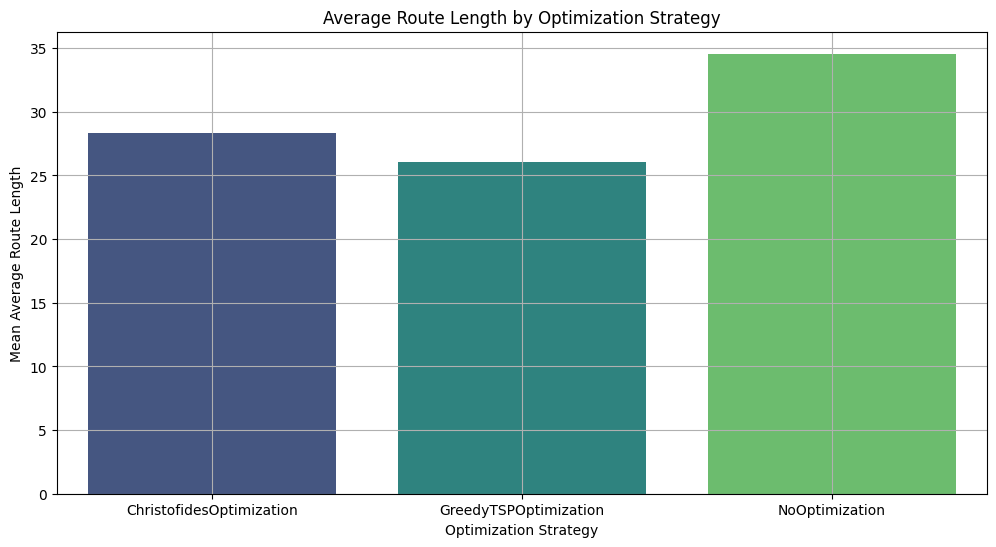

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt


def plot_quality_by_optimization_strategy(df: pd.DataFrame) -> None:
    """Generate a bar plot comparing average route length for each optimization strategy."""
    quality_df = (
        df.groupby(["optimization_strategy"])
        .agg({"avg_route_length": "mean"})
        .reset_index()
    )

    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=quality_df,
        x="optimization_strategy",
        y="avg_route_length",
        palette="viridis",
    )
    plt.title("Average Route Length by Optimization Strategy")
    plt.xlabel("Optimization Strategy")
    plt.ylabel("Mean Average Route Length")
    plt.grid(True)
    plt.show()


df = load_benchmark_data(file_pattern)
df = aggregate_quality_metrics(df)

plot_quality_by_optimization_strategy(df)

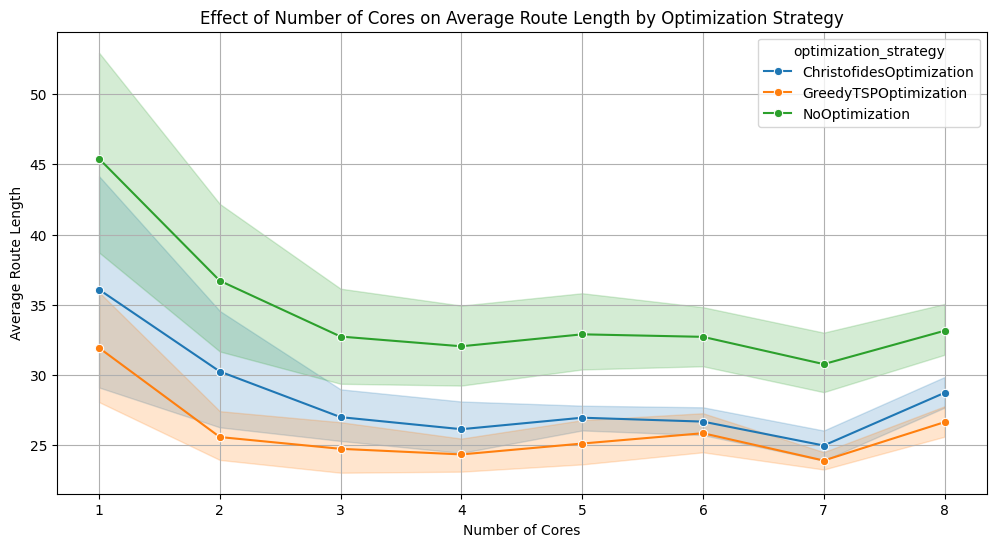

In [59]:
def plot_quality_by_cores_and_optimization(df: pd.DataFrame) -> None:
    """Generate line plots showing how cores affect avg_route_length for each optimization strategy."""
    plt.figure(figsize=(12, 6))
    sns.lineplot(
        data=df,
        x="cores",
        y="avg_route_length",
        hue="optimization_strategy",
        marker="o",
    )
    plt.title(
        "Effect of Number of Cores on Average Route Length by Optimization Strategy"
    )
    plt.xlabel("Number of Cores")
    plt.ylabel("Average Route Length")
    plt.grid(True)
    plt.show()


plot_quality_by_cores_and_optimization(df)